### Iris dataset

In [68]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# load data
iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [32]:
# Features matrix and label vector
X = iris.iloc[:,:4].values.reshape(-1,4)
y = iris.iloc[:,4].values
y_enc = LabelEncoder().fit_transform(y)
y_one_hot_label = tf.keras.utils.to_categorical(y_enc)

# Training, testing and validation split
X_temp, X_test, y_temp, y_test = train_test_split(X, y_one_hot_label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print("The training set contains: ", X_train.shape, y_train.shape)
print("The validation set contains: ", X_val.shape, y_test.shape)
print("The testing set contains: ", X_test.shape, y_test.shape)
print(X_train.shape[1:])


The training set contains:  (96, 4) (96, 3)
The validation set contains:  (24, 4) (30, 3)
The testing set contains:  (30, 4) (30, 3)
(4,)


In [56]:
model = Sequential([
    keras.layers.Input(shape=X_train.shape[1:]), # Input layer
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax") # Ouput layer
])

model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(X_train, y_train, epochs=250, verbose=1, validation_data=(X_val, y_val))

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9831 - loss: 0.2071 - val_accuracy: 0.8750 - val_loss: 0.2885
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9909 - loss: 0.2148 - val_accuracy: 0.8750 - val_loss: 0.2884
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9909 - loss: 0.2204 - val_accuracy: 0.8750 - val_loss: 0.2862
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9909 - loss: 0.2156 - val_accuracy: 0.8750 - val_loss: 0.2819
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9909 - loss: 0.2112 - val_accuracy: 0.8750 - val_loss: 0.2819
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9948 - loss: 0.2183 - val_accuracy: 0.8750 - val_loss: 0.2817
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9948 - loss: 0.1966 - val_accuracy: 0.8750 - val_loss: 0.2789
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9909 - loss: 0.2169 - val_accuracy: 0.8750 - val_loss

In [59]:
## Predicting testing set
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[6.27987320e-04, 8.97864997e-01, 1.01506896e-01],
       [9.98944700e-01, 1.05533574e-03, 4.12348211e-10],
       [2.52994425e-08, 4.23512515e-03, 9.95764852e-01],
       [5.15197287e-04, 8.30982149e-01, 1.68502599e-01],
       [5.87307499e-04, 9.30679381e-01, 6.87334016e-02],
       [9.98505712e-01, 1.49436493e-03, 1.73962922e-09],
       [4.16373787e-03, 9.90309894e-01, 5.52625488e-03],
       [1.46964085e-05, 1.35133877e-01, 8.64851415e-01],
       [4.14201844e-04, 5.25043070e-01, 4.74542618e-01],
       [2.50288821e-03, 9.85915899e-01, 1.15811713e-02],
       [3.14311837e-05, 2.39474788e-01, 7.60493696e-01],
       [9.98036802e-01, 1.96305546e-03, 4.65353400e-09],
       [9.99163687e-01, 8.36271967e-04, 4.08122119e-10],
       [9.98119414e-01, 1.88059744e-03, 3.54313578e-09],
       [9.97996867e-01, 2.00305483e-03, 1.99426187e-09],
       [3.65653104e-04, 9.00358021e-01, 9.92762893e-02],
       [2.37520695e-07, 8.28638300e-03, 9.91713345e-01],
       [2.67784134e-03, 9.76252

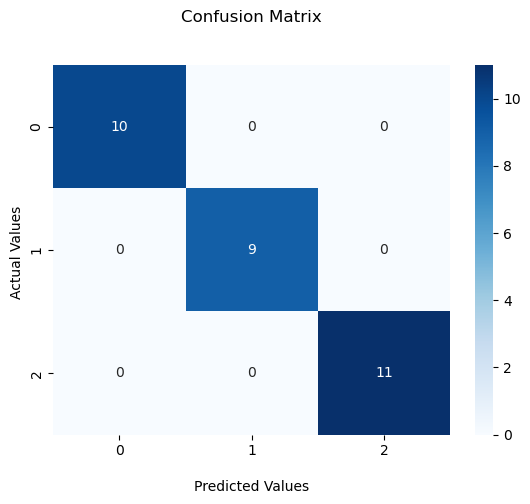

In [70]:
# Convert to classes
y_pred_class = np.around(y_pred)

# Accuracy
acc = accuracy_score(y_test, y_pred_class)

# Confusion matrix
plt.figure()
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_class, axis=1))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()